# Classification of Faults in Electric Power Transmission Lines

## Franklin Edwin Bartels

The final project is an individual project, where you apply one or more machine learning techniques to some power system planning/operation problem. A good project either has the potential to be polished into a research paper, or is suitable to be transformed into teaching materials.

This template is for your reference. You do not have to strictly follow it. You can remove the instructions. You need to submit a `.zip` file, which includes the `.ipynb` file, the `.html` file, a `data` folder, and a `figs` folder (if applicable).

The project will be graded by both the instructor and the TA. Please feel free to contact (at least one of) us (by email or attending office hours) as you work on the project.

The outline of the project is similar to an IEEE research paper.

## Introduction

The main role of an electric power transmission line is to transmit electric power from the generation network to the distribution network. The electrical power system however, consists of several complex dynamic and interacting elements which are prone to electrical faults.

Normally, the power system is said to be operating under balanced conditions. Insulation failure, contact of live wires, vegetation falling on wires, etc. may lead to an unbalanced system. This situation leads to a fault. Faults can be broadly categorized into 2: open-circuit faults and short-circuit faults. In this project, we turn our focus to short-circuit faults, as they are the more common type of fault.

Short-circuit faults are classified as either symmectrical (all phases are shorted to each other or to ground) or asymmetrical (fault involving only one or two phases). Symmetrical faults are the more severe type though they rarely occur. Asymmetrical faults on the other hand are the more common type. In this project, we explore some machine learning techniques that can help us in detecting and classifying faults which occur in electric power transmission lines.




## Problem Statement

[Department of Energy](https://www.oe.netl.doe.gov/OE417_annual_summary.aspx) has made available over 20 years of data on electric power outages in the USA. A cursory glance at this data shows over 4,000 cases of power outages reported. Outages are unpleasant occurances as they disrupt productivity. Given that an electric fault usually results in power outage, it is essential, that power engineers can quickly identify the fault and attend to any outage situation as soon as possible. 

It is therefore imperative that we build models that can be used to predict the type of electric fault as accurately as possible to aid power engineers. This is exactly what this project seeks to achieve: to use machine learning models to detect whether or not a fault exists, and to specify which type of fault, if indeed there is an electric fault.

The performance of the model will be assessed based on how often our prediction matches the actual fault. An accuracy of 95% or more is desirable. Execution speed is of concern, though secondary. The dataset used for this project is available [here](files/data/classData.csv). The data was generated by [[Jamil, Sharma & Singh]](https://springerplus.springeropen.com/articles/10.1186/s40064-015-1080-x#:~:text=section%20is%20conclusion.-,Artificial%20neural%20network,form%20can%20be%20dealt%20with.) through simulations. The authors applied Artificial Nueral Networks to detect and classify electric faults. We shall see other machine learning approaches to the problem in this project.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as Xgb

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('data/classData.csv')
df

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983
...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


NB: The line voltages are in per unit.
'0' indicates the line is not involved in the fault. '1' indicates the line is involved in the fault.

## Methodology

In this project, we shall explore Extreme Generation Boost Classifier (XGBoost), created by [Tianqi Chen](https://tqchen.com/). XGBoost is an algorithm that has recently dominated the applied machine learning space. It is an implementation of gradient boosted decision trees that has been designed for speed and performance. XGBoost combines weak learners to form a strong learner. A weaker learner here means, a machine learning model which is only slightly better than random guessing. It is however possible to form a strong learner by combining weak learners. In the XGBoost method, a number of decision trees are trainded. Each tree is trained on a subset of the data, and their predictions are combined to form a final prediction. 

The reasons to use XGBoost are for (1) Execution Speed and (2) Model Performance. When compared to other implementations of gradient boosting, XGBoost is really fast. In [this blog](https://datascience.la/benchmarking-random-forest-implementations/), [Szilard Pafka](https://www.linkedin.com/in/szilard) compared the performance of XGBoost to other implementations of graident boosting and bagged decision trees. XGBoost dominates structured datasets on classification and regression predictive modeling.

[[XBoost: A Scalable Tree Boosting System]](https://arxiv.org/abs/1603.02754) is a good reference material which explains the underlying math of the XGBoost Classifier.

Here is how XGBoost matched with the other methods in terms of speed and performance when [Vishal Morde](https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d) did his analysis:


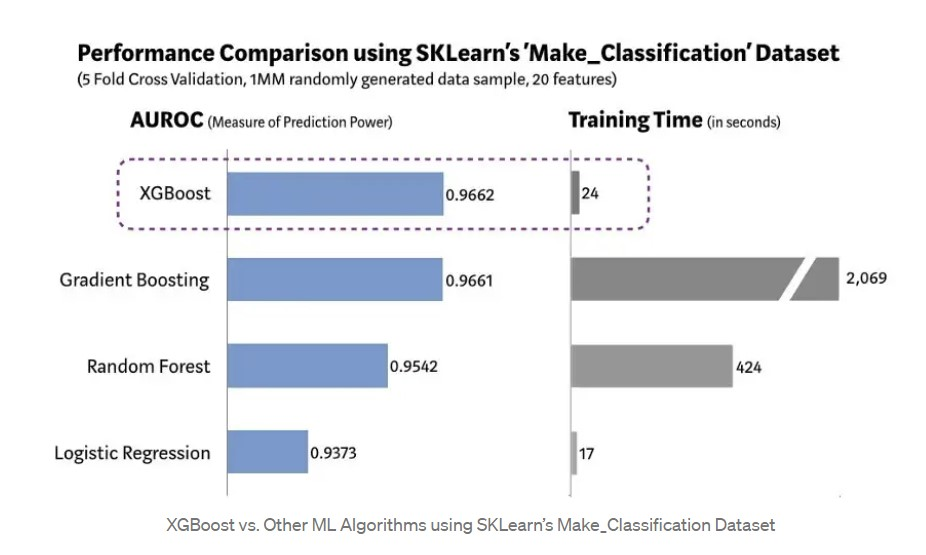

In [2]:
from IPython.display import Image
Image('figs/xgboost.jpg', width=800)

From the figure above, we can see that XGBoost does better than other methods like Random Forest and Logistic Regression, which were covered in the course. We shall implement these methods on our data and see how they compare.

## Implementation

Lets's get back to our goal - to accurately predict the type of fault in an electric transmission line.
To begin, let's view the proportion of faults which involve the 3 phases (A, B, C) and ground (G)

Text(0.5, 1.0, 'Fault on Line A')

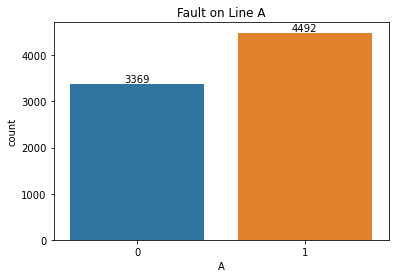

In [3]:
ax = sns.countplot(x='A', data=df)
ax.bar_label(ax.containers[0])
plt.title("Fault on Line A")

Text(0.5, 1.0, 'Fault on Line B')

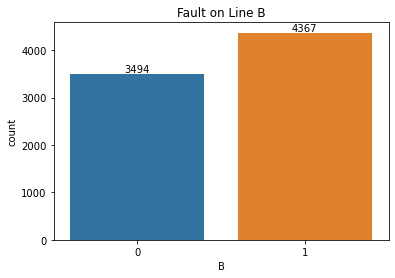

In [4]:
ax = sns.countplot(x='B', data=df)
ax.bar_label(ax.containers[0])
plt.title("Fault on Line B")

Text(0.5, 1.0, 'Fault on Line C')

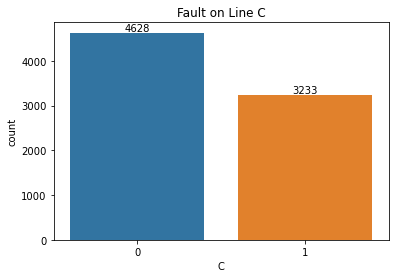

In [5]:
ax = sns.countplot(x='C', data=df)
ax.bar_label(ax.containers[0])
plt.title("Fault on Line C")

Text(0.5, 1.0, 'Ground Fault')

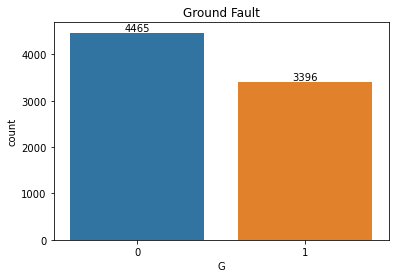

In [6]:
ax = sns.countplot(x='G', data=df)
ax.bar_label(ax.containers[0])
plt.title("Ground Fault")

We shall now 'code' the faults. 

For example: 
- 1100 means fault on G-C or Line C to Ground fault
- 1010 means fault on G-B or Line B to Grouud fault
- 1001 means fault on G-A or Line A to Ground fault
- 0011 means fault on B-A or Line A to Line B fault

In [7]:
df['Type of Fault'] = df['G'].astype('str') + df['C'].astype('str') \
                            + df['B'].astype('str') + df['A'].astype('str')

df

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Type of Fault
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001
...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,0000
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,0000
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,0000
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,0000


Let's rename these faults to make interpretaion easier, rather than using the binaries used before.

In [8]:
df['Type of Fault'][df['Type of Fault'] == '0000'] = 'No Fault'

df['Type of Fault'][df['Type of Fault'] == '1001'] = 'Line A to Gound Fault'
df['Type of Fault'][df['Type of Fault'] == '1010'] = 'Line B to Gound Fault'
df['Type of Fault'][df['Type of Fault'] == '1100'] = 'Line C to Gound Fault'

df['Type of Fault'][df['Type of Fault'] == '0011'] = 'Line A to Line B Fault'
df['Type of Fault'][df['Type of Fault'] == '0101'] = 'Line A to Line C Fault'
df['Type of Fault'][df['Type of Fault'] == '0110'] = 'Line B to Line C Fault'


df['Type of Fault'][df['Type of Fault'] == '1011'] = 'Line A, Line B to Grund Fault'
df['Type of Fault'][df['Type of Fault'] == '1101'] = 'Line A, Line C to Grund Fault'
df['Type of Fault'][df['Type of Fault'] == '1110'] = 'Line B, Line C to Grund Fault'
df['Type of Fault'][df['Type of Fault'] == '0111'] = 'Line A, Line B, Line C Fault'


df['Type of Fault'][df['Type of Fault'] == '1111'] = 'Line A, Line B, Line C to Ground Fault'
df

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Type of Fault
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,Line A to Gound Fault
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,Line A to Gound Fault
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,Line A to Gound Fault
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,Line A to Gound Fault
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,Line A to Gound Fault
...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,No Fault
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,No Fault
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,No Fault
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,No Fault


In [9]:
df.describe()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,0.432006,0.411271,0.555527,0.571429,13.721194,-44.845268,34.392394,-0.007667,0.001152,0.006515
std,0.495387,0.492095,0.496939,0.494903,464.741671,439.269195,371.107412,0.289150,0.313437,0.307897
min,0.000000,0.000000,0.000000,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.608016,-0.612709
25%,0.000000,0.000000,0.000000,0.000000,-119.802518,-271.845947,-61.034219,-0.130287,-0.159507,-0.215977
50%,0.000000,0.000000,1.000000,1.000000,2.042805,5.513317,-4.326711,-0.005290,0.001620,0.009281
75%,1.000000,1.000000,1.000000,1.000000,227.246377,91.194282,49.115141,0.111627,0.153507,0.239973
max,1.000000,1.000000,1.000000,1.000000,885.738571,889.868884,901.274261,0.595342,0.627875,0.600179


Now let's view the distribution of faults

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Line A to Gound Fault'),
  Text(1, 0, 'Line A, Line B to Grund Fault'),
  Text(2, 0, 'Line B to Line C Fault'),
  Text(3, 0, 'Line A, Line B, Line C Fault'),
  Text(4, 0, 'Line A, Line B, Line C to Ground Fault'),
  Text(5, 0, 'No Fault')])

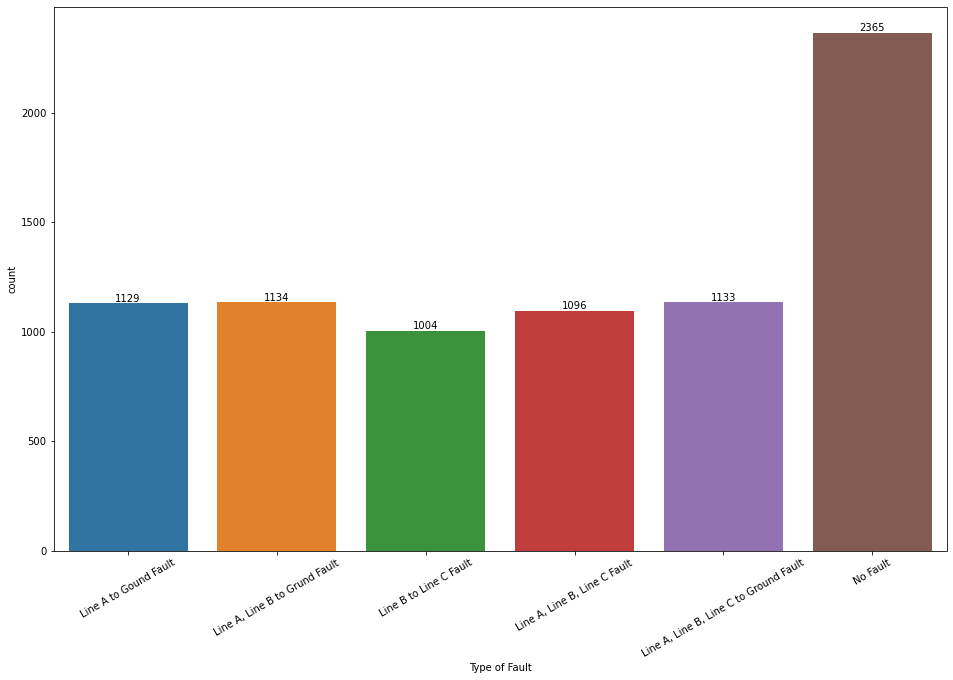

In [10]:
ax = plt.figure(figsize=(16, 10))
ax = sns.countplot(x='Type of Fault', data=df)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=30)

It happens that some types of faults (eg. Line C to Ground Fault, Line B to Ground Fault) are not present in the data that we have, but that is fine. 
Before building any models and testing them, we shall do feature engineering. We shall convert the categoricals (Type of Fault) to numericals

In [11]:
encoder = LabelEncoder()
df['Type of Fault'] = encoder.fit_transform(df['Type of Fault'])
df

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Type of Fault
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,0
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,0
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,0
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,0
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,0
...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,5
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,5
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,5
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,5


Let's now specify our input & output parameters and split our data into train & test sets.

Recall: The goal is to predict the type of fault. Therefore, our output will be the 'Type of Fault'. Our input parameters are whatever our model requires to make that intelligent prediction on the 'Type of Fault'. In this case our input will be everything other than the 'Type of Fault' column.

In [12]:
X = df.drop(['Type of Fault'], axis = 1)                # input
y = df['Type of Fault']                                 # output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

We are now ready to build our models. We shall use 3 of the methods discussed in class: Logistic Regression, Support Vector Machine and Random Forest. Then we shall look at the power of the XGBoost method.

### Model 1: Logistic Regression

Prediction Time [s]: 0.002
Training Accuracy: 91.31 %
Model Accuracy: 90.59 %


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

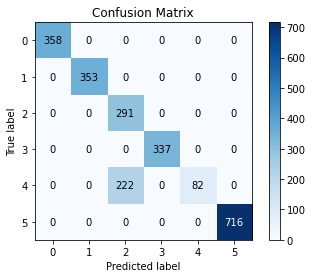

In [13]:
LRmodel = LogisticRegression()                                         # instantiate model
LRmodel.fit(X_train, y_train)

start_ts = time.time()
prediction = LRmodel.predict(X_test)
end_ts = time.time()
time_LR = end_ts-start_ts
print(f"Prediction Time [s]: {time_LR:.3f}")

logistic_train = round(LRmodel.score(X_train, y_train)*100, 2)          # training accuracy
logistic_accuracy = round(accuracy_score(prediction, y_test)*100, 2)    # model accuracy

print("Training Accuracy:", logistic_train, "%")
print("Model Accuracy:", logistic_accuracy, "%")

skplt.metrics.plot_confusion_matrix(y_test, prediction)

### Model 2: Support Vector Machine (SVM)

Prediction Time [s]: 1.278
Training Accuracy: 75.95 %
Model Accuracy: 75.54 %


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

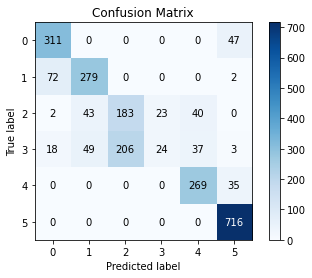

In [14]:
SVMmodel = SVC()                                                    # instantiate model
SVMmodel.fit(X_train, y_train)

start_ts = time.time()
prediction = SVMmodel.predict(X_test)
end_ts = time.time()
time_SVM = end_ts-start_ts
print(f"Prediction Time [s]: {time_SVM:.3f}")

svm_train = round(SVMmodel.score(X_train, y_train)*100, 2)          # training accuracy
svm_accuracy = round(accuracy_score(prediction, y_test)*100, 2)     # model accuracy

print("Training Accuracy:", svm_train, "%")
print("Model Accuracy:", svm_accuracy, "%")

skplt.metrics.plot_confusion_matrix(y_test, prediction)

### Model 3: Random Forest

Prediction Time [s]: 0.063
Training Accuracy: 100.0 %
Model Accuracy: 100.0 %


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

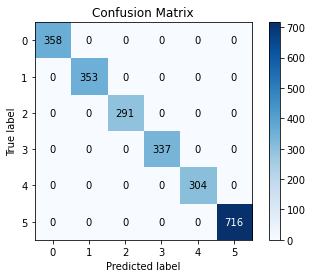

In [15]:
RFmodel = RandomForestClassifier()                                    # instantiate model
RFmodel.fit(X_train, y_train)

start_ts = time.time()
prediction = RFmodel.predict(X_test)
end_ts = time.time()
time_RF = end_ts-start_ts
print(f"Prediction Time [s]: {time_RF:.3f}")

random_train = round(RFmodel.score(X_train, y_train)*100, 2)          # training accuracy
random_accuracy = round(accuracy_score(prediction, y_test)*100, 2)    # model accuracy

print("Training Accuracy:", random_train, "%")
print("Model Accuracy:", random_accuracy, "%")

skplt.metrics.plot_confusion_matrix(y_test, prediction)

### Model 4: XGBoost Classifier

Prediction Time [s]: 0.009
Training Accuracy: 100.0 %
Model Accuracy: 100.0 %


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

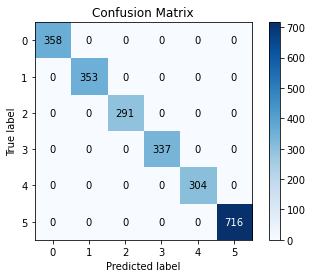

In [16]:
XGBmodel = Xgb.XGBClassifier()                                     # instantiate model
XGBmodel.fit(X_train, y_train)

start_ts = time.time()
prediction = XGBmodel.predict(X_test)
end_ts = time.time()
time_XGB = end_ts-start_ts
print(f"Prediction Time [s]: {time_XGB:.3f}")

xgb_train = round(XGBmodel.score(X_train, y_train)*100, 2)          # training accuracy
xgb_accuracy = round(accuracy_score(prediction, y_test)*100, 2)     # model accuracy

print("Training Accuracy:", xgb_train, "%")
print("Model Accuracy:", xgb_accuracy, "%")

skplt.metrics.plot_confusion_matrix(y_test, prediction)

## Results

To put everything into perspective, let's compare the different models

In [17]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machine', 'Random Forest', 'XGBoost'],
    
    'Training Accuracy(%)': [logistic_train, svm_train, random_train, xgb_train],
    
    'Model Accuracy Score(%)': [logistic_accuracy, svm_accuracy, random_accuracy, xgb_accuracy],
    
    'Speed(s)':[time_LR, time_SVM, time_RF, time_XGB]    
})
models

,Model,Training Accuracy(%),Model Accuracy Score(%),Speed(s)
0,Logistic Regression,91.31,90.59,0.001999
1,Support Vector Machine,75.95,75.54,1.277609
2,Random Forest,100.00,100.00,0.063399
3,XGBoost,100.00,100.00,0.009037


Though logistic regression is pretty fast on this dataset, we sacrifice accuracy for speed.

Random Forest and XGBoost do a good job in terms of the accuracy (100%). XGBoost's speed is much better than Random Forest. This is even without calling the 'gpu_hist' tree_method on the XGBoost. 

Having built the models, it's now time to test them to see how well they do on predicting the type of fault.

### Model 1: Logistic Regression

In [18]:
LR_prediction = LRmodel.predict(X_test)                # predict on new data
cross_checking = pd.DataFrame({'Actual' : y_test, 'Predicted' : LR_prediction})
cross_checking.sample(20)

,Actual,Predicted
5824,5,5
2892,4,2
960,0,0
693,0,0
1430,1,1
4641,3,3
4679,3,3
1615,1,1
1677,1,1
1731,1,1


### Model 2: Support Vector Machine

In [19]:
SVM_prediction = SVMmodel.predict(X_test)                 # predict on new data
cross_checking = pd.DataFrame({'Actual' : y_test, 'Predicted' : SVM_prediction})
cross_checking.sample(20)

,Actual,Predicted
2641,4,4
5247,3,2
6834,5,5
4996,3,2
2879,4,5
3203,4,4
4905,3,4
2303,4,4
2664,4,5
6686,5,5


### Model 3: Random Forest

In [20]:
RF_prediction = RFmodel.predict(X_test)                 # predict on new data
cross_checking = pd.DataFrame({'Actual' : y_test, 'Predicted' : RF_prediction})
cross_checking.sample(20)

,Actual,Predicted
1079,0,0
598,0,0
6678,5,5
1952,1,1
1954,1,1
3753,2,2
6978,5,5
1840,1,1
1737,1,1
681,0,0


### Model 4: XGBoost

In [21]:
XGB_prediction = XGBmodel.predict(X_test)                    # predict on new data
cross_checking = pd.DataFrame({'Actual' : y_test, 'Predicted' : XGB_prediction})
cross_checking.sample(20)

,Actual,Predicted
84,0,0
6533,5,5
3404,2,2
6891,5,5
421,0,0
4914,3,3
2453,4,4
970,0,0
4103,2,2
6689,5,5


## Conclusion

 * In this project, we have been able to apply machine learning to a dataset to predict the type of fault in electric transmission line.
 * The power of the XGBoost Classifier has been explored in this project. It is seen to yield 100% accuracy on this dataset, and is much faster than other decision-tree based methods like Random Forest, although it is not a guarantee of yielding 100% on other datasets. 
 * It is enlightening to see that we can actually build simple machine learning models that do very well on fault prediction in transmission lines. 

## Future Directions

- Rather than using dataset from simulated faults, it would be interesting to see how the model works on actual faults that have occured in real-life in the past. Unfortunately, there isn't a lot of publicly available data on this.
- The scope of XGBoost is wide and can be explored more. It would be interesting to see the limits of this classifier. 
- At what point does XGBoost not perform well / at what point does it become necessary to move away from this method and use a 'better' one?